In [50]:
# Different Optimization techniques
# MBGD is best for 1000 and 10000 i.e bigger datasets
# Stochastic is better for smaller datasets <100
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [61]:
def generate_data(timesteps=10, samples=50):
    X = np.random.randn(samples, timesteps, 1)  # Random time-series data
    y = np.random.randn(samples, 1)  # Random labels
    return X, y

In [62]:
X_train, y_train = generate_data(samples=30)
X_test, y_test = generate_data(samples=20)

In [63]:
def create_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    return model

In [64]:
print("Training with Batch Gradient Descent (BGD)")
model_bgd = create_model()
model_bgd.compile(optimizer=Adam(), loss='mse')
history_bgd = model_bgd.fit(X_train, y_train, batch_size=len(X_train), epochs=100, verbose=1, validation_data=(X_test, y_test))

Training with Batch Gradient Descent (BGD)
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0159 - val_loss: 0.9293
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.0065 - val_loss: 0.9291
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9974 - val_loss: 0.9294
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.9886 - val_loss: 0.9301
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.9800 - val_loss: 0.9313
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.9718 - val_loss: 0.9330
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9639 - val_loss: 0.9353
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.9565 - val_loss: 0.9384
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.9496 - val_loss: 0.9422
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9432 - val_loss: 0.9468
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.9372 - val_loss: 0.9523
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━

In [65]:
print("\nTraining with Stochastic Gradient Descent (SGD)")
model_sgd = create_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='mse')
history_sgd = model_sgd.fit(X_train, y_train, batch_size=1, epochs=100, verbose=1, validation_data=(X_test, y_test))


Training with Stochastic Gradient Descent (SGD)
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.9178 - val_loss: 0.9973
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2287 - val_loss: 1.0306
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0102 - val_loss: 1.0067
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6107 - val_loss: 1.0178
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5564 - val_loss: 1.0236
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5558 - val_loss: 1.0318
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8208 - val_loss: 1.0339
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6607 - val_loss: 1.0302
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9099 - val_loss: 1.0563
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0239 - val_loss: 1.0418
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7405 - val_loss: 1.0295
Epoch 12/100


In [66]:
print("\nTraining with Mini-Batch Gradient Descent (MBGD)")
model_mbgd = create_model()
model_mbgd.compile(optimizer=Adam(), loss='mse')
history_mbgd = model_mbgd.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))


Training with Mini-Batch Gradient Descent (MBGD)
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0481 - val_loss: 0.9604
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 1.0368 - val_loss: 0.9581
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.0260 - val_loss: 0.9563
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1.0160 - val_loss: 0.9551
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 1.0067 - val_loss: 0.9545
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.9978 - val_loss: 0.9545
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9894 - val_loss: 0.9551
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.9815 - val_loss: 0.9562
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.9741 - val_loss: 0.9577
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9672 - val_loss: 0.9598
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9608 - val_loss: 0.9624
Epoch 12/100
1/1 ━━

In [67]:
def evaluate_model(model, name):
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Loss: {loss}")

In [68]:
evaluate_model(model_bgd, "BGD")
evaluate_model(model_sgd, "SGD")
evaluate_model(model_mbgd, "MBGD")

BGD Test Loss: 0.9493371248245239
SGD Test Loss: 1.005759835243225
MBGD Test Loss: 0.9232641458511353


In [69]:
def plot_loss_curves(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f"{label} Train Loss")
        plt.plot(history.history['val_loss'], label=f"{label} Validation Loss")
    plt.title("Loss Curves for Different Optimization Techniques")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

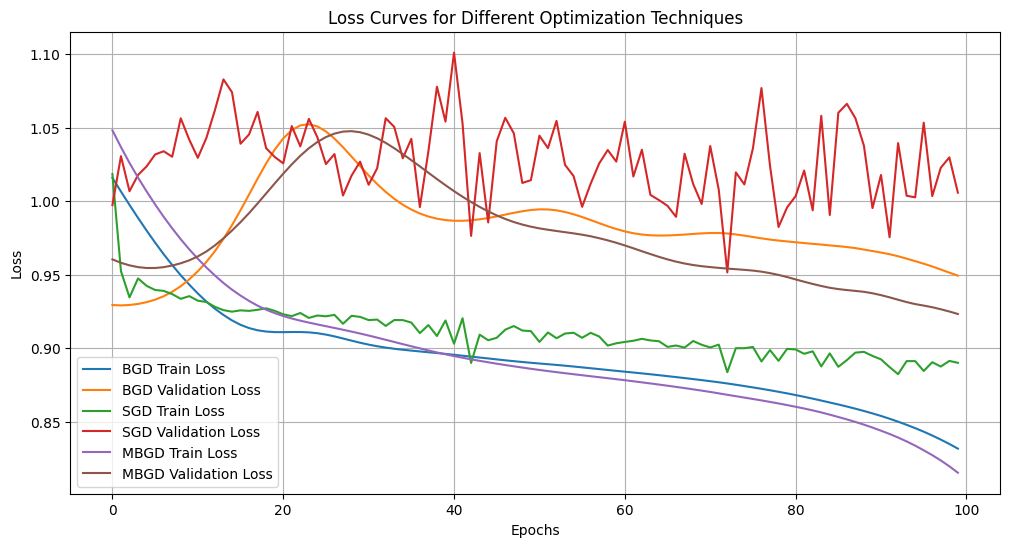

In [70]:
plot_loss_curves(
    histories=[history_bgd, history_sgd, history_mbgd],
    labels=["BGD", "SGD", "MBGD"]
)

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [100]:
'''def generate_temperature_data(num_entries=500):
    # Parameters: time, humidity, wind speed, solar radiation, cloud cover
    time = np.arange(num_entries)
    humidity = np.random.uniform(30, 90, num_entries)
    wind_speed = np.random.uniform(0, 20, num_entries)
    solar_radiation = np.random.uniform(0, 1000, num_entries)
    cloud_cover = np.random.uniform(0, 1, num_entries)

    # Temperature is influenced by these factors
    temperature = 20 + 0.1 * time + 0.5 * humidity - 0.2 * wind_speed + 0.01 * solar_radiation - 5 * cloud_cover + np.random.normal(0, 2, num_entries)

    min_temp = 20
    max_temp = 50
    temperature = (temperature - np.min(temperature)) / (np.max(temperature) - np.min(temperature))  # Normalize to [0, 1]
    temperature = temperature * (max_temp - min_temp) + min_temp  # Scale to [20, 50]

    # Reshape data for LSTM input
    X = np.column_stack((time, humidity, wind_speed, solar_radiation, cloud_cover)).reshape(num_entries, 5, 1)
    y = temperature.reshape(num_entries, 1)

    min_temp = 20
    max_temp = 50
    temperature = (temperature - np.min(temperature)) / (np.max(temperature) - np.min(temperature))  # Normalize to [0, 1]
    temperature = temperature * (max_temp - min_temp) + min_temp  # Scale to [20, 50]

    return X, y'''
def generate_temperature_data(num_entries):
    # Parameters: time, humidity, wind speed, solar radiation, cloud cover

    # Scale time to be in the range of 20-50
    time = np.linspace(20, 50, num_entries)

    # Scale humidity to be in the range of 20-50
    humidity = np.random.uniform(0, 1, num_entries)  # Generate values between 0 and 1
    humidity = humidity * (50 - 20) + 20       # Scale to 20-50

    # Scale wind speed to be in the range of 20-50
    wind_speed = np.random.uniform(0, 1, num_entries)
    wind_speed = wind_speed * (50 - 20) + 20

    # Scale solar radiation to be in the range of 20-50
    solar_radiation = np.random.uniform(0, 1, num_entries)
    solar_radiation = solar_radiation * (50 - 20) + 20

    # Scale cloud cover to be in the range of 20-50
    cloud_cover = np.random.uniform(0, 1, num_entries)
    cloud_cover = cloud_cover * (50 - 20) + 20


    # Temperature is influenced by these factors (scaled to 20-50)
    temperature = 20 + 0.1 * (time - 20) + 0.5 * (humidity - 20) - 0.2 * (wind_speed - 20) + 0.01 * (solar_radiation - 20) - 5 * (cloud_cover - 20) + np.random.normal(0, 2, num_entries)

    # Ensure temperature is within the range of 20-50
    temperature = np.clip(temperature, 20, 50)

    # Reshape data for LSTM input
    X = np.column_stack((time, humidity, wind_speed, solar_radiation, cloud_cover)).reshape(num_entries, 5, 1)
    y = temperature.reshape(num_entries, 1)

    return X, y

In [99]:
X_train, y_train = generate_temperature_data(num_entries=300)
X_test, y_test = generate_temperature_data(num_entries=200)

In [96]:
def create_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    return model

In [97]:
print("Training with Batch Gradient Descent (BGD)")
model_bgd = create_model()
model_bgd.compile(optimizer=Adam(), loss='mse')
history_bgd = model_bgd.fit(X_train, y_train, batch_size=len(X_train), epochs=100, verbose=1, validation_data=(X_test, y_test))

Training with Batch Gradient Descent (BGD)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1050.9187 - val_loss: 982.1177
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 997.1724 - val_loss: 930.0413
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 945.3895 - val_loss: 880.1710
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 895.7117 - val_loss: 832.5662
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 848.1903 - val_loss: 787.2023
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 802.7947 - val_loss: 743.9766
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 759.4246 - val_loss: 702.7241
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 717.9258 - val_loss: 663.2507
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 678.1304 - val_loss: 625.3480
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 639.8452 - val_loss: 588.7907
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 602.8391 - val_loss: 553.3206
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [98]:
print("\nTraining with Stochastic Gradient Descent (SGD)")
model_sgd = create_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.001), loss='mse')
history_sgd = model_sgd.fit(X_train, y_train, batch_size=1, epochs=100, verbose=1, validation_data=(X_test, y_test))


Training with Stochastic Gradient Descent (SGD)
Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 12/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [80]:
print("\nTraining with Mini-Batch Gradient Descent (MBGD)")
model_mbgd = create_model()
model_mbgd.compile(optimizer=Adam(), loss='mse')
history_mbgd = model_mbgd.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))


Training with Mini-Batch Gradient Descent (MBGD)
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6144.0400 - val_loss: 3562.2710
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1613.2090 - val_loss: 404.5724
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 486.1952 - val_loss: 178.8857
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 244.0565 - val_loss: 495.8454
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144.7632 - val_loss: 74.9885
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 57.3610 - val_loss: 44.4649
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.1915 - val_loss: 69.6598
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.6569 - val_loss: 63.5343
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.1604 - val_loss: 47.4425
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0075 - val_loss: 36.5686
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.132

In [81]:
def evaluate_model(model, name):
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Loss: {loss}")
evaluate_model(model_bgd, "BGD")
evaluate_model(model_sgd, "SGD")
evaluate_model(model_mbgd, "MBGD")

BGD Test Loss: 26.785409927368164
SGD Test Loss: nan
MBGD Test Loss: 26.437074661254883


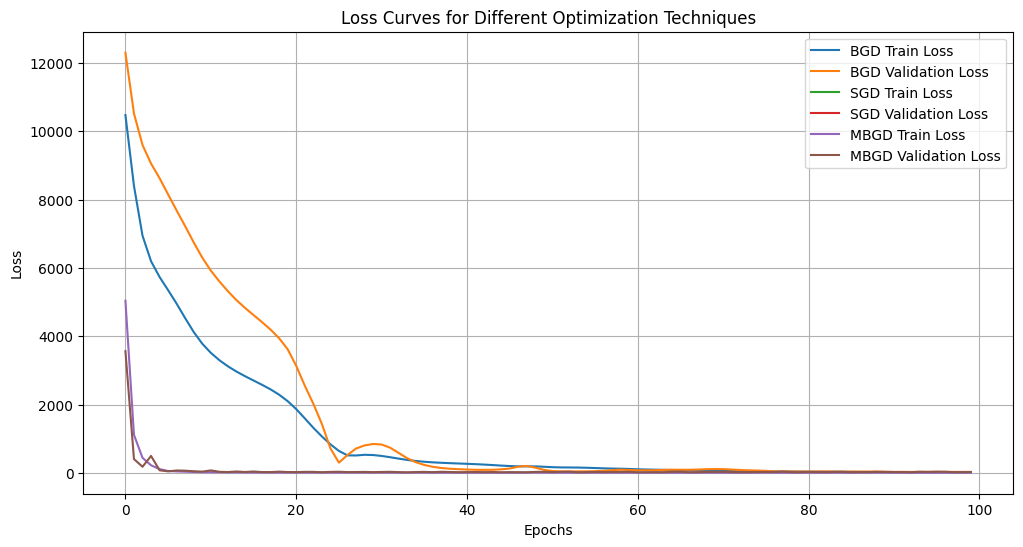

In [83]:
def plot_loss_curves(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f"{label} Train Loss")
        plt.plot(history.history['val_loss'], label=f"{label} Validation Loss")
    plt.title("Loss Curves for Different Optimization Techniques")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss_curves(
    histories=[history_bgd, history_sgd, history_mbgd],
    labels=["BGD", "SGD", "MBGD"]
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


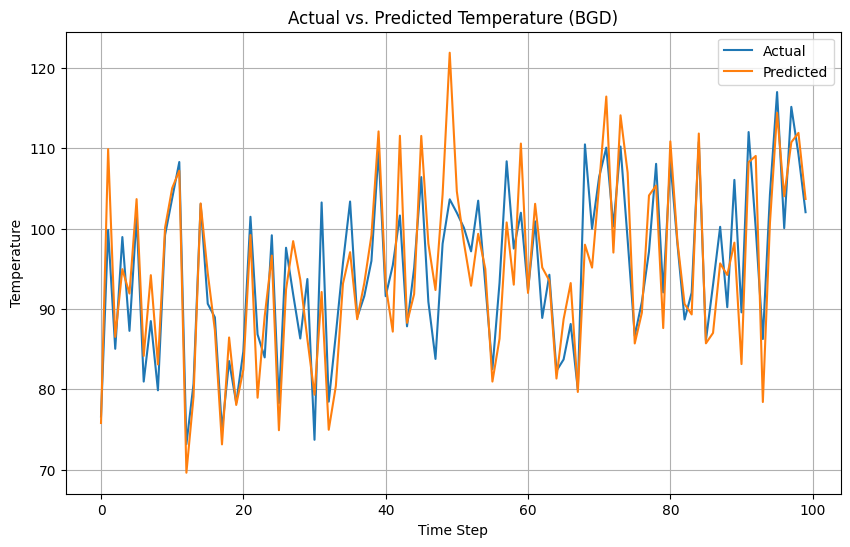

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


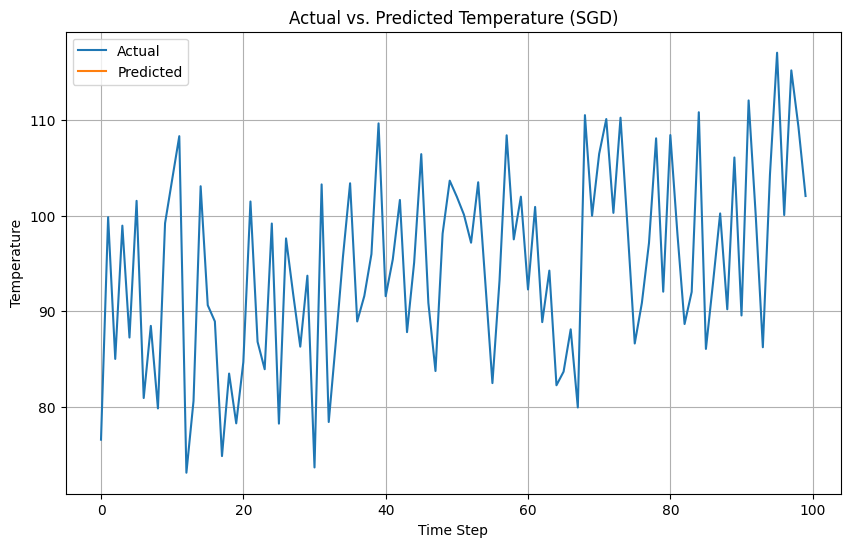

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


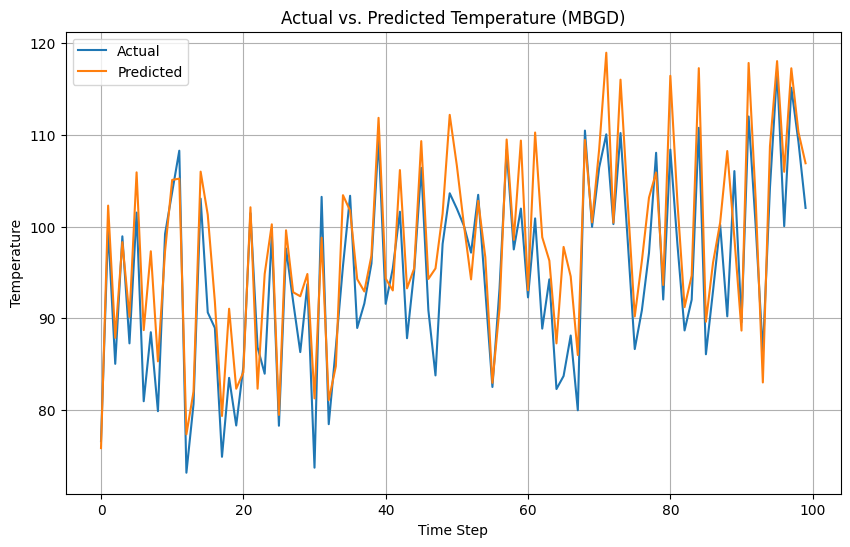

In [84]:
def plot_predictions(model, name):
    predictions = model.predict(X_test)
    plt.figure(figsize=(10,6))
    plt.plot(y_test, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'Actual vs. Predicted Temperature ({name})')
    plt.xlabel('Time Step')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_predictions(model_bgd, 'BGD')
plot_predictions(model_sgd, 'SGD')
plot_predictions(model_mbgd, 'MBGD')

In [111]:
#Linear Prediction
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [112]:
def generate_linear_data(samples=1000):
    X = np.linspace(0, 10, samples).reshape(-1, 1)
    y = 3 * X + np.random.normal(0, 0.5, X.shape)  # y = 3x + noise
    return X, y

In [113]:
def scale_data(X, y):
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    return X_scaled, y_scaled, scaler_X, scaler_y

In [114]:
def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_dim=1),
        Dense(1)
    ])
    return model

In [115]:
def train_and_evaluate(optimizer, batch_size, X_train, y_train, X_test, y_test, name):
    model = create_model()
    model.compile(optimizer=optimizer, loss='mse')
    model.fit(X_train, y_train, batch_size=batch_size, epochs=50, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    predictions = model.predict(X_test)
    print(f"{name} Test Loss: {loss}")
    return predictions, loss

In [116]:
X, y = generate_linear_data()
X_scaled, y_scaled, scaler_X, scaler_y = scale_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [117]:
print("Training with Batch Gradient Descent (BGD)")
y_pred_bgd, loss_bgd = train_and_evaluate(Adam(learning_rate=0.01), len(X_train), X_train, y_train, X_test, y_test, "BGD")

print("\nTraining with Stochastic Gradient Descent (SGD)")
y_pred_sgd, loss_sgd = train_and_evaluate(SGD(learning_rate=0.01), 1, X_train, y_train, X_test, y_test, "SGD")

print("\nTraining with Mini-Batch Gradient Descent (MBGD)")
y_pred_mbgd, loss_mbgd = train_and_evaluate(Adam(learning_rate=0.01), 32, X_train, y_train, X_test, y_test, "MBGD")

Training with Batch Gradient Descent (BGD)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
BGD Test Loss: 0.0004286327166482806

Training with Stochastic Gradient Descent (SGD)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
SGD Test Loss: 0.00027188268722966313

Training with Mini-Batch Gradient Descent (MBGD)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MBGD Test Loss: 0.00027019542176276445


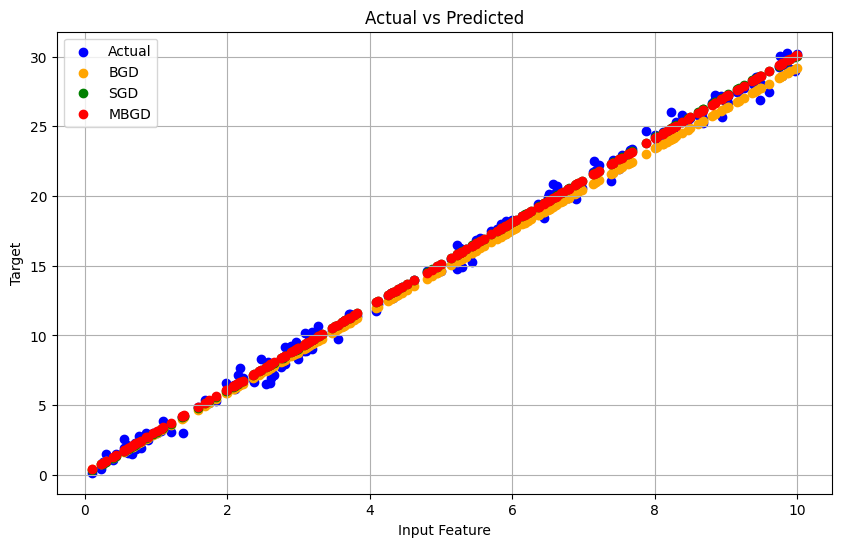

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_test), label="Actual", color="blue")
plt.scatter(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_pred_bgd), label="BGD", color="orange")
plt.scatter(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_pred_sgd), label="SGD", color="green")
plt.scatter(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_pred_mbgd), label="MBGD", color="red")
plt.title("Actual vs Predicted")
plt.xlabel("Input Feature")
plt.ylabel("Target")
plt.legend()
plt.grid()
plt.show()

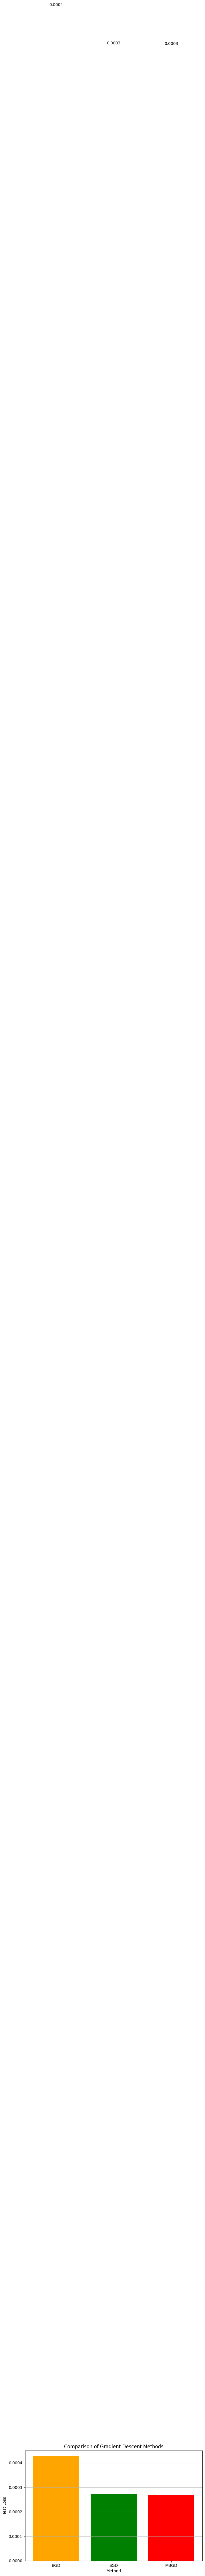

In [121]:
losses = [loss_bgd, loss_sgd, loss_mbgd]
labels = ["BGD", "SGD", "MBGD"]
plt.figure(figsize=(8, 5))
plt.bar(labels, losses, color=['orange', 'green', 'red'])
plt.title("Comparison of Gradient Descent Methods")
plt.ylabel("Test Loss")
plt.xlabel("Method")
for i, loss in enumerate(losses):
    plt.text(i, loss + 0.01, f"{loss:.4f}", ha='center')
plt.grid(axis='y')
plt.show()